# 2.6 Fixed-point iteration

Many root-finding methods are based on the so-called fixed-point iteration, a method we discuss in this section.
\begin{definition}\label{def:chap2_def37}
A number $p$ is a fixed-point for a function $g(x)$ if $g(p)=p.$
\end{definition}


We have two problems that are related to each other:
- **Fixed-point problem**: Find $p$ such that $g(p)=p.$
- **Root-finding problem**: Find $p$ such that $f(p)=0.$

We can formulate a root-finding problem as a fixed-point problem, and vice versa. For example, assume we want to solve the root finding problem, $f(p)=0.$ Define $g(x)=x-f(x),$ and observe that if $p$ is a fixed-point of $g(x)$, that is, $g(p)=p-f(p)=p,$ then $p$ is a root of $f(x)$. Here the function $g$ is not unique: there are many ways one can represent the root-finding problem $f(p)=0$ as a fixed-point problem, and as we will learn later, not all will be useful to us in developing fixed-point iteration algorithms.

The next theorem answers the following questions: When does a function $g$ have a fixed-point? If it has a fixed-point, is it unique?

\begin{theorem}\label{theo:chap2_thm38}
\begin{enumerate}

\item If $g$ is a continuous function on $[a,b]$ and $g(x)\in[a,b]$ for all $x\in[a,b]$, then $g$ has at least one fixed-point in $[a,b]$.
\item If, in addition, $|g(x)-g(y)|\leq\lambda|x-y|$ for all $x,y\in[a,b]$
where $0<\lambda<1,$ then the fixed-point is unique.
\end{enumerate}
\end{theorem}

\begin{proof}
Consider $f(x)=g(x)-x$. Assume $g(a)\neq a$ and $g(b)\neq b$ (otherwise
the proof is over.) Then $f(a)=g(a)-a>0$ since $g(a)$ must be greater
than $a$ if it's not equal to $a$. Similarly, $f(b)=g(b)-b<0$. Then
from IVT, there exists $p\in(a,b)$ such that $f(p)=0$, or $g(p)=p$.
To prove part 2, suppose there are two different fixed-points $p,q$.
Then
\begin{equation*}
|p-q|=|g(p)-g(q)|\leq\lambda|p-q|<|p-q|
\end{equation*}
which is a contradiction.
\end{proof}

\begin{remark}\label{rem:chap2_rem39}
Let $g$ be a differentiable function
on $[a,b]$ such that $|g'(x)|\leq k$ for all $x\in(a,b)$ for some
positive constant $k<1$. Then the hypothesis of part 2 of Theorem \ref{theo:chap2_thm38} is satisfied with $\lambda=k.$ Indeed,
from the mean value theorem
\begin{equation*}
|g(x)-g(y)|=|g'(\xi)(x-y)|\leq k|x-y|
\end{equation*}
 for all $x,y\in[a,b]$.
\end{remark}

The following theorem describes how we can find a fixed point.

\begin{theorem}\label{theo:chap2_thm40}
If $g$ is a continuous function on $[a,b]$ satisfying the conditions

1. $g(x)\in[a,b]$ for all $x\in[a,b]$,
2. $|g(x)-g(y)|\leq\lambda|x-y|$, for $x,y\in[a,b]$ where $0<\lambda<1,$

then the **fixed-point iteration**
\begin{equation*}
p_{n}=g(p_{n-1}),n\geq1
\end{equation*}
converges to $p,$ the unique fixed-point of $g$ in $[a,b]$, for any
starting point $p_{0}\in[a,b]$.    
\end{theorem}

\begin{proof}
Since $p_{0}\in[a,b]$ and $g(x)\in[a,b]$ for all $x\in[a,b]$,
all iterates $p_{n}\in[a,b]$. Observe that
\begin{equation*}
|p-p_{n}|=|g(p)-g(p_{n-1})|\leq\lambda|p-p_{n-1}|.
\end{equation*}
Then by induction, $|p-p_{n}|\leq\lambda^{n}|p-p_{0}|$. Since $0<\lambda<1$,
$\lambda^{n}\rightarrow0$ as $n\rightarrow\infty$, and thus $p_{n}\rightarrow p$.
\end{proof}

\begin{remark}\label{rem:chap2_rem41}
Theorem \ref{theo:chap2_thm40} still
holds if the second condition $|g(x)-g(y)|\leq\lambda|x-y|$, is replaced
by $|g'(x)|\leq k$ for all $x\in[a,b]$ where $0<k<1$. (See Remark \ref{rem:chap2_rem39}).
\end{remark}


\begin{corollary}\label{cor:chap2_cor42}
If $g$ satisfies the hypothesis of Theorem \ref{theo:chap2_thm40}, then the following error bounds hold.

1. $|p-p_{n}|\leq\frac{\lambda^{n}}{1-\lambda}|p_{1}-p_{0}|$
2. $|p-p_{n}|\leq\frac{1}{1-\lambda}|p_{n+1}-p_{n}|$
3. $|p-p_{n+1}|\leq\frac{\lambda}{1-\lambda}|p_{n+1}-p_{n}|$
4. $|p-p_{n}|\leq\lambda^{n}\max\{p_{0}-a,b-p_{0}\}$
\end{corollary}

\begin{proof}
We only show the proofs of the first two inequalities. Proofs of the other inequalities should be straightforward.

1. By the triangle inequality property, we have
   \begin{equation*}
    |p-p_0| \le |p-p_1| + |p_1-p_0| \le \lambda |p-p_0| + |p_1-p_0|,
   \end{equation*}
   which leads to
   \begin{equation*}
   |p-p_0| \le \frac{|p_1-p_0|}{1-\lambda}.
   \end{equation*}
   Then we have from the proof of Theorem \ref{theo:chap2_thm40} that
   \begin{equation*}
   |p-p_n| \le \lambda^{n}|p-p_{0}| \le \frac{\lambda^{n}}{1-\lambda}|p_1-p_0|.
   \end{equation*}
   
2. Similarly,
   \begin{equation*}
    |p-p_n| \le |p-p_{n+1}| + |p_{n+1}-p_n| \le \lambda |p-p_n| + |p_{n+1}-p_n|.
   \end{equation*}
   As a result, we have
   \begin{equation*}
   |p-p_n| \le \frac{|p_{n+1}-p_n|}{1-\lambda}.
   \end{equation*}
\end{proof}

**Geometric interpretation of fixed-point iteration**

In the following figures, take a starting value $p_0$ close to $p$, and mark the first few fixed-point iterations, $p_0,p_1,p_2$. Observe that the fixed-point iteration converges in the first graph, but diverges in the second one.
![Fixed-point iteration: $|g'(p)|<1$.](images/fixedpt_conv.png)

![Fixed-point iteration: $|g'(p)|>1$.](images/fixedpt_div.png)

\begin{example}\label{example:chap2_exa43}
Consider the root-finding problem $x^{3}-2x^{2}-1=0$ on $[1,3].$

1. Write the problem as a fixed-point problem, $g(x)=x$, for some $g$. Verify that the hypothesis of Theorem \ref{theo:chap2_thm40} (or Remark \ref{rem:chap2_rem41}) is satisfied so that the fixed-point iteration converges.
2. Let $p_{0}=1.$ Use Corollary \ref{cor:chap2_cor42} to find $n$ that ensures an estimate to $p$ accurate to within $10^{-4}$.
\end{example}

**Solution**

1. There are several ways we can write this problem as $g(x)=x:$

   a. Let $f(x)=x^{3}-2x^{2}-1$, and $p$ be its root, that is, $f(p)=0$. If we let $g(x)=x-f(x)$, then $g(p)=p-f(p)=p,$ so $p$ is a fixed-point of $g$. However, this choice for $g$ will not be helpful, since $g$ does not satisfy the first condition of Theorem \ref{theo:chap2_thm40}: $g(x)\notin[1,3]$ for all $x\in[1,3]$ ($g(3)=-5\notin[1,3]$).

   b. Since $p$ is a root for $f$, we have $p^3=2p^2+1$, or $p=(2p^2+1)^{1/3}.$ Therefore, $p$ is the solution to the fixed-point problem $g(x)=x$ where $g(x)=(2x^2+1)^{1/3}$.

   - $g$ is increasing on $[1,3]$ and $g(1)=1.44,g(3)=2.67$; thus $g(x)\in[1,3]$ for all $x\in[1,3]$. Therefore, $g$ satisfies the first condition of Theorem \ref{theo:chap2_thm40}.
   - $g'(x)=\frac{4x}{3(2x^2+1)^{2/3}}$ and $g'(1)=0.64,g'(3)=0.56$ and $g'$ is decreasing on $[1,3]$. Therefore $g$ satisfies the condition in Remark \ref{rem:chap2_rem41} with $k=0.64$.

   Then, from Theorem \ref{theo:chap2_thm40} and  Remark \ref{rem:chap2_rem41}, the fixed-point iteration converges if $g(x)=(2x^2+1)^{1/3}$.

2. Take $\lambda=k=0.64$ in Corollary \ref{cor:chap2_cor42} and use bound (4):
   \begin{equation*}
   |p-p_{n}|\leq(0.64)^{n}\max\{1-1,3-1\}=2(0.64^{n}).
   \end{equation*}
   We want $2(0.64^{n})<10^{-4}$, which implies $n\log0.64<-4\log10-\log 2$, or $n>\frac{-4\log10-\log 2}   {\log0.64}\approx22.19$. Therefore $n=23$ is the smallest number of iterations that ensures an absolute error of $10^{-4}$.

## Python code for fixed-point iteration

The following code starts with the initial guess $p_0$ (*pzero* in the code), computes $p_1=g(p_0)$, and checks if the stopping criterion $|p_1-p_0|<\epsilon$ is satisfied. If it is satisfied the code terminates with the value $p_1$. Otherwise $p_1$ is set to $p_0$, and the next iteration is computed.

In [1]:
import numpy as np
def fixedpt(g, pzero, eps, N):
    n = 1
    while n<N:
        print(n)
        pone = g(pzero)
        if np.abs(pone-pzero)<eps:
            print('p is ', pone, ' and the iteration number is ', n)
            return
        pzero = pone
        n += 1
    print('Did not converge. The last estimate is p = ', pzero)

Let's find the fixed-point of $g(x)=x$ where $g(x)=(2x^2+1)^{1/3}$,
with $p_0=1$. We studied this problem in Example \ref{example:chap2_exa43}  where we found that
23 iterations guarantee an estimate accurate to within $10^{-4}$. We
set $\epsilon=10^{-4}$, and $N=30$, in the above code.

In [2]:
fixedpt(lambda x: (2*x**2+1)**(1/3), 1, 1e-4, 30)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
p is  2.205472095330031  and the iteration number is  19


The exact value of the fixed-point, equivalently the root of
$x^3-2x^2-1$, is 2.20556943. Then the exact error is:

In [3]:
2.205472095330031-2.20556943

-9.733466996930673e-05

A take home message and a word of caution:

- The exact error, $|p_n-p|$, is guaranteed to be less than $10^{-4}$ after 23 iterations from Corollary \ref{cor:chap2_cor42}, but as we observed in this example, this could happen before 23 iterations.
- The stopping criterion used in the code is based on $|p_n-p_{n-1}|$, not $|p_n-p|$, so the iteration number that makes these quantities less than a tolerance $\epsilon$ will not be the same in general.

\begin{theorem}\label{theo:chap2_thm44}
Assume $p$ is a solution of $g(x)=x$,
and suppose $g(x)$ is continuously differentiable in some interval
about $p$ with $|g'(p)|<1$. Then the fixed-point iteration converges to $p$, provided $p_{0}$ is chosen sufficiently close to $p$. Moreover, the convergence is linear if $g'(p)\neq 0$.
\end{theorem}

\begin{proof}
Since $g'$ is continuous
and $|g'(p)| < 1$, there exists an interval $I=[p-\epsilon,p+\epsilon]$
such that $|g'(x)|\leq k$ for all $x\in I$, for some $k<1$. Then, from Remark \ref{rem:chap2_rem39},
we know $|g(x)-g(y)|\leq k|x-y|$ for all $x,y\in I$. Next, we argue
that $g(x)\in I$ if $x\in I$. Indeed, if $|x-p|<\epsilon,$ then

\begin{equation*}
|g(x)-p|=|g(x)-g(p)|=|g'(\xi)||x-p|<k\epsilon<\epsilon
\end{equation*}
hence $g(x)\in I.$ Now use Theorem \ref{theo:chap2_thm40}, setting
$[a,b]$ to $[p-\epsilon,p+\epsilon]$, to conclude the fixed-point iteration converges.

To prove convergence is linear, we note
\begin{equation*}
|p_{n+1}-p|=|g(p_n)-g(p)| = |g'(\xi_n)| |p_n-p| \leq k |p_n-p|
\end{equation*}
which is the definition of linear convergence (with $k$ being a positive constant less than 1).

We can actually prove something more:
\begin{equation*}
\lim_{n\rightarrow\infty}\frac{|p_{n+1}-p|}{|p_{n}-p|} =\lim_{n\rightarrow\infty}\frac{|g(p_{n})-g(p)|}{|p_{n}-p|}=\lim_{n\rightarrow\infty}\frac{|g'(\xi_{n})||p_{n}-p|}{|p_{n}-p|} =\lim_{n\rightarrow\infty}|g'(\xi_{n})|=|g'(p)|.
\end{equation*}
The last equality follows since $g'$ is continuous, and $\xi_{n}\rightarrow p$, which is a consequence of $\xi_{n}$ being between $p$ and $p_{n}$, and $p_{n}\rightarrow p$, as $n\rightarrow\infty$.
\end{proof}

\begin{example}\label{example:chap2_exa45}
Let $g(x)=x+c(x^{2}-2),$ which has the fixed-point $p=\sqrt{2}\approx1.4142.$
Pick a value for $c$ to ensure the convergence of fixed-point iteration.
For the picked value $c$, determine the interval of convergence $I=[a,b],$
that is, the interval for which any $p_{0}$ from the interval gives
rise to a converging fixed-point iteration. Then write a Python code
to test the results.
\end{example}

**Solution.**

Theorem \ref{theo:chap2_thm44} requires $|g'(p)|<1.$ We have
$g'(x)=1+2xc,$ and thus $g'(\sqrt{2})=1+2\sqrt{2}c$. Therefore
\begin{align*}
|g'(\sqrt{2})| & <1\Rightarrow-1<1+2\sqrt{2}c<1\\
 & \Rightarrow-2<2\sqrt{2}c<0\\
 & \Rightarrow\frac{-1}{\sqrt{2}}<c<0.
\end{align*}
Any $c$ from this interval works: let's pick $c=-1/4$.

Now we need to find an interval $I=[\sqrt{2}-\epsilon,\sqrt{2}+\epsilon]$
such that
\begin{equation*}
|g'(x)|=|1+2xc|=\left|1-\frac{x}{2} \right| \leq k
\end{equation*}
for some $k<1,$ for all $x\in I$. Plot $g'(x)$ and observe that
one choice is $\epsilon=0.1$, so that $I=[\sqrt{2}-0.1,\sqrt{2}+0.1]=[1.3142,1.5142]$.
Since $g'(x)$ is positive and decreasing on $I=[1.3142,1.5142]$, $|g'(x)|\leq1-\frac{1.3142}{2}=0.3429<1$, for any $x\in I$. Then any starting value
$p_{0}$ from $I$ gives convergence.


For $c=-1/4$, the function becomes $g(x)=x-\frac{x^2-2}{4}$. Pick
$p_0=1.5$ as the starting point. Using the fixed-point iteration code of the previous example, we obtain:

In [4]:
fixedpt(lambda x: x-(x**2-2)/4, 1.5, 1e-5, 15)

1
2
3
4
5
6
7
8
9
p is  1.414214788550556  and the iteration number is  9


 The absolute error is:

In [5]:
1.414214788550556-(2**.5)

1.2261774609001463e-06

Let's experiment with other starting values. Although $p_0=2$ is not in the
interval of convergence $I$, we expect convergence since $g'(2)=0$, and thus we can find another interval around $p=\sqrt{2}$ that contains $2$ such that $g'(x)$ is bounded by a constant less than $1$ on the interval.

In [6]:
fixedpt(lambda x: x-(x**2-2)/4, 2, 1e-5, 15)

1
2
3
4
5
6
7
8
9
10
p is  1.414214788550556  and the iteration number is  10


Let's try $p_0=-5$. Note that this is not only outside the interval of
convergence $I$, but $g'(-5)=3.5>1$, so we do not expect
convergence.

In [7]:
fixedpt(lambda x: x-(x**2-2)/4, -5, 1e-5, 15)

1
2
3
4
5
6
7
8
9
10
11


OverflowError: (34, 'Result too large')

Let's verify the linear convergence of the fixed-point iteration numerically in this example. We write another version of the fixed-pointcode, **fixedpt2**, and we compute $\frac{p_n-\sqrt{2}}{p_{n-1}-\sqrt{2}}$ for each $n$.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def fixedpt2(g, pzero, eps, N):
    n = 1
    arr = np.array([])
    error = 1.
    while n<N and error>eps:
        pone = g(pzero)
        error = np.abs(pone-pzero)
        arr = np.append(arr, (pone-2**0.5)/(pzero-2**0.5))
        pzero = pone
        n += 1
    return arr

In [10]:
arr = fixedpt2(lambda x: x-(x**2-2)/4, 1.5, 1e-7, 15)
arr

array([0.27144661, 0.28707161, 0.291222  , 0.29240652, 0.29275091,
       0.29285156, 0.29288102, 0.29288965, 0.29289217, 0.29289291,
       0.29289313, 0.29289319])

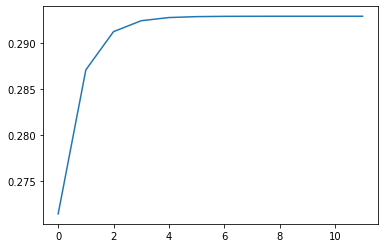

In [11]:
plt.plot(arr);

 The graph suggests the limit of
$\frac{p_n-\sqrt{2}}{p_{n-1}-\sqrt{2}}$ exists and it is around 0.295,
supporting linear convergence.